# Cell-cell interaction analysis (multiple LRs, within-spot)

### 1. Data loading and preprocessing

In [1]:
import stlearn as st
import pandas as pd
import random
st.settings.set_figure_params(dpi=100)
# read in visium dataset downloaded from: support.10xgenomics.com/spatial-gene-expression/datasets/1.0.0/V1_Breast_Cancer_Block_A_Section_2
data = st.Read10X("C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1")
st.add.image(adata=data, imgpath="C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\Data\\visium\\Human_Breast_Cancer_Block_A_Section_1\\spatial\\tissue_hires_nobg.png",
            library_id="V1_Breast_Cancer_Block_A_Section_1", visium=True)

st.pp.filter_genes(data,min_cells=3)
st.pp.normalize_total(data)
st.pp.scale(data)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Added tissue image to the object!
Normalization step is finished in adata.X
Scale step is finished in adata.X


### 2. Cell type diversity

label transfer results added to adata.uns['label_transfer']
predicted label added to adata.obs['predictions'].


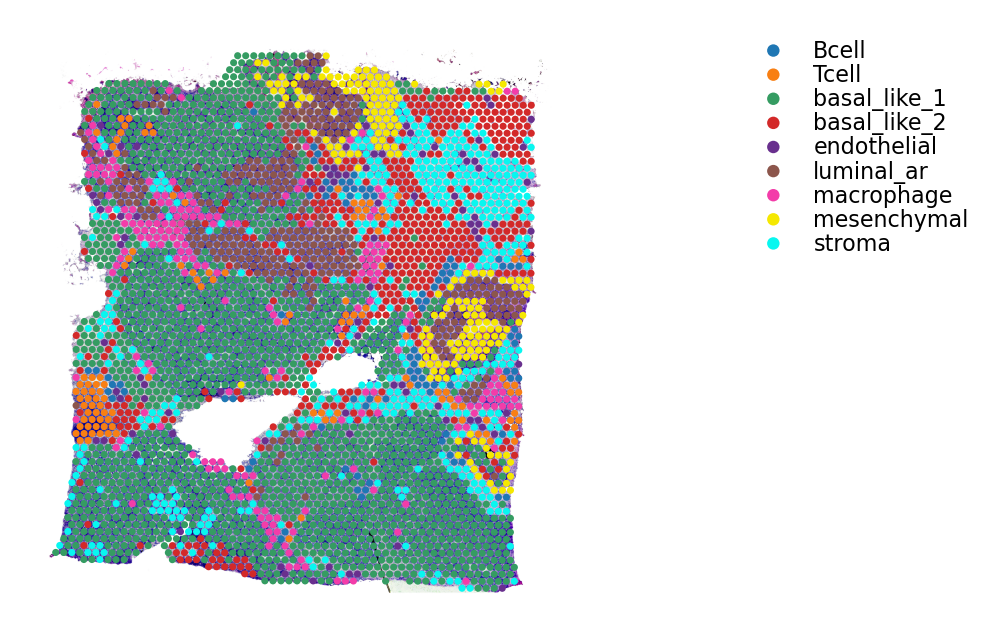

<Figure size 600x400 with 0 Axes>

In [2]:
# Read in the cell type predictions for each spot based on label transfer
st.add.labels(data, 'label_transfer_bc.csv')
st.pl.cluster_plot(data,use_label="predictions", name='label_transfer', output='.')

Counts for cluster (cell type) diversity stored into adata.uns['cci_het']


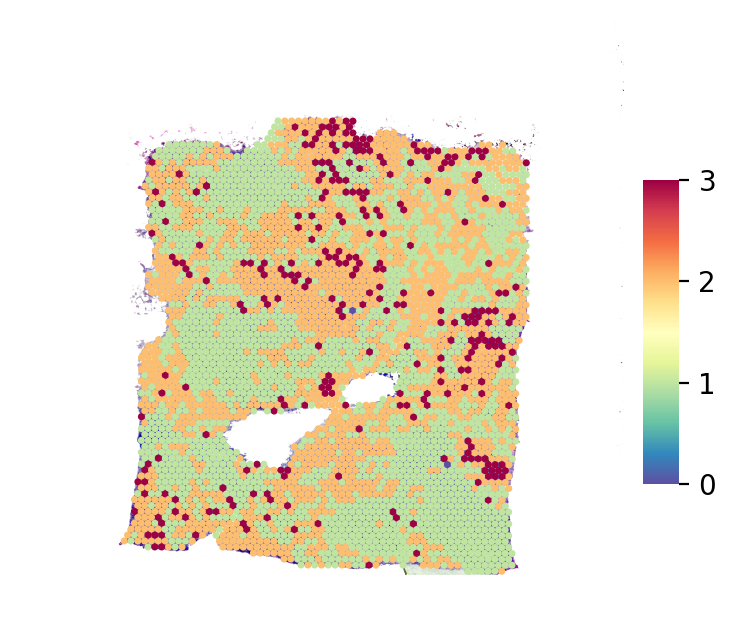

In [3]:
st.tl.cci.het.count(data, use_clustering='label_transfer', distance=0)
st.pl.het_plot(data, use_het='cci_het', name='het_louvain', output='.')

### 3. Ligand-receptor co-expression

#### Read in known LR pairs from connectomedb

In [4]:
st.add.lr(adata=data, db_filepath = "C:\\Users\\uqjxu8\\GIH\\Bioinformatics\\SPA\\cellphonedb\\connectomedb2020.txt", sep="\t", source="connectomedb")

#### Calculate the proportion of known ligand-receptor co-expression in the neighbouring spots

Altogether 3460 valid L-R pairs
L-R interactions with neighbours are counted and stored into adata.uns['cci_lr']


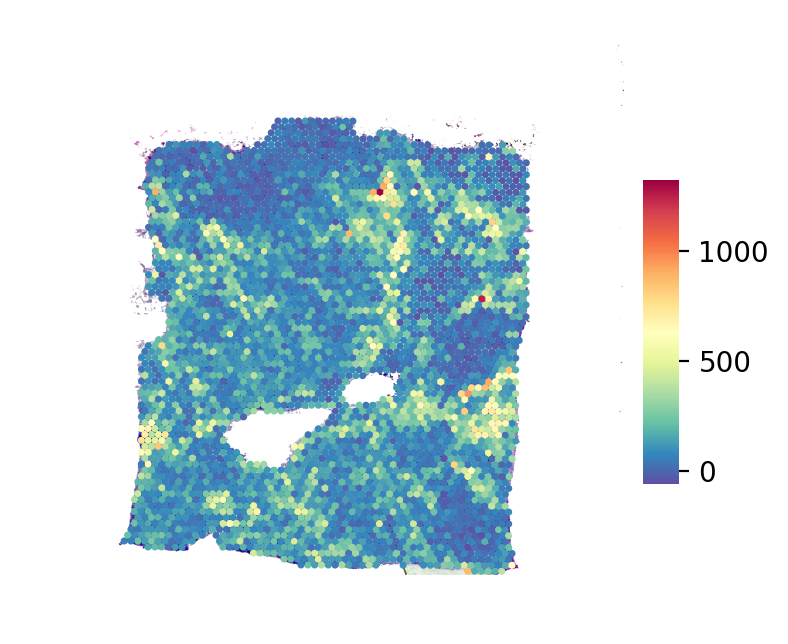

In [5]:
st.tl.cci.base.lr(adata=data, distance=0)
st.pl.het_plot(data, use_het='cci_lr', name='cci_lr', output='.')

### 4. Merge CCI cell type diversity and L-R coexpression scores

Results of spatial interaction analysis has been written to adata.uns['merged']


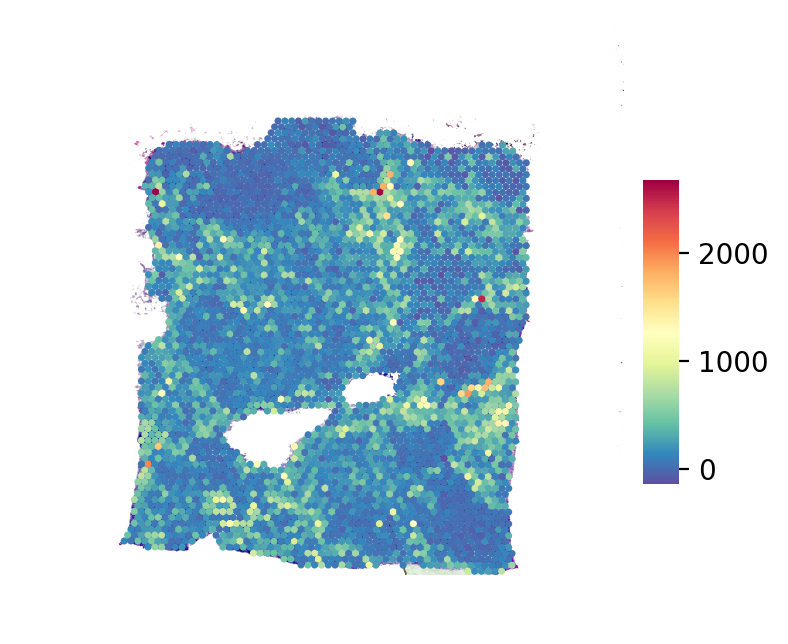

In [6]:
st.tl.cci.merge(data, use_lr='cci_lr', use_het='cci_het')
st.pl.het_plot(data, use_het='merged', name='merged', output='.')